<a href="https://colab.research.google.com/github/yohanesnuwara/open-geoscience-repository/blob/master/dutch-f3/dutch_f3_spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install segyio

     |████████████████████████████████| 92kB 3.4MB/s 


# Read Data

In [0]:
filename = '/content/drive/My Drive/Public geoscience Data/Dutch F3 seismic data/Dutch Government_F3_entire_8bit seismic.segy'

In [5]:
import segyio

with segyio.open(filename) as f:
  print('Inline range from', min(f.ilines), 'to', max(f.ilines))
  print('Crossline range from', min(f.xlines), 'to', max(f.xlines)) 
  data = segyio.tools.cube(f)
  clip_percentile = 99
  vm = np.percentile(data, clip_percentile)

  inlines = f.ilines
  crosslines = f.xlines
  twt = f.samples + 1000

f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

Inline range from 100 to 750
Crossline range from 300 to 1250


'The 99th percentile is 6517; the max amplitude is 32767'

In [0]:
inlines[:10]

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109], dtype=int32)

In [0]:
crosslines[:10]

array([300, 301, 302, 303, 304, 305, 306, 307, 308, 309], dtype=int32)

2D Slice

In [6]:
# slice the data at inline 300
inline_number = 300
slices = data[(inline_number+1),:,:]
slices.shape

(951, 462)

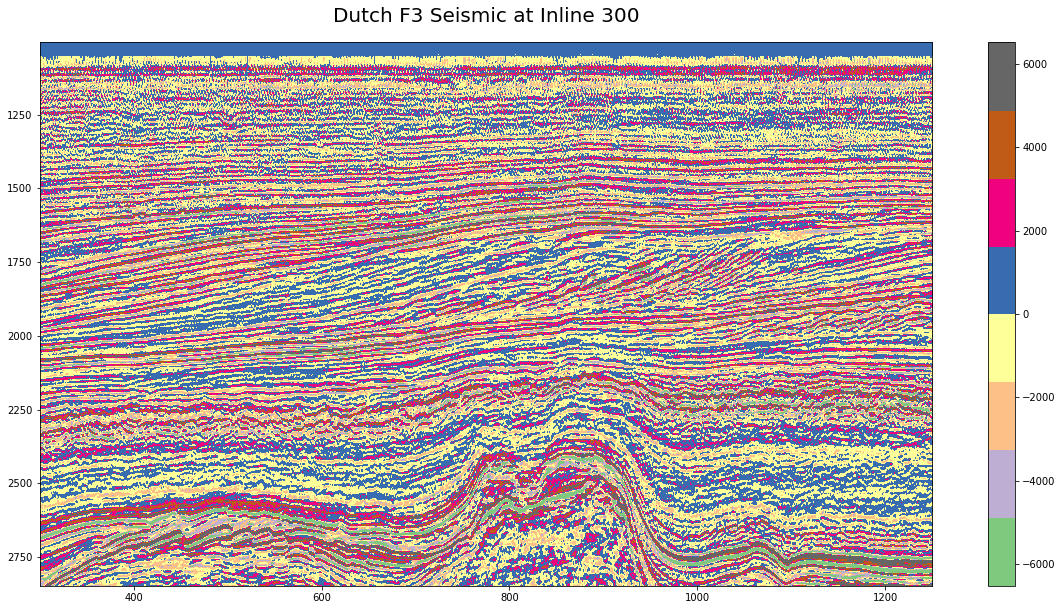

In [7]:
plt.figure(figsize=(20,10))
extent = [crosslines[0], crosslines[-1], twt[-1], twt[0]]
p1 = plt.imshow(slices.T, vmin=-vm, vmax=vm, aspect='auto', extent=extent, cmap='Accent')
plt.title('Dutch F3 Seismic at Inline {}'.format(inline_number), size=20, pad=20)
plt.colorbar(p1)
plt.show()

## Frequency of 2D Slice

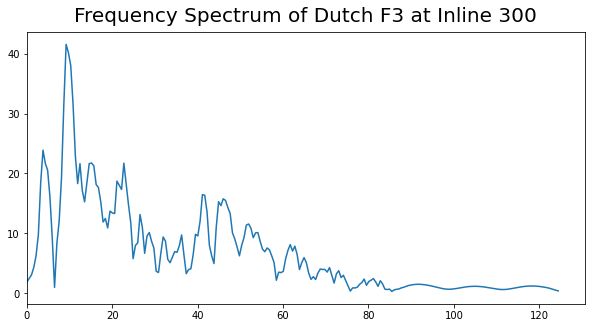

In [120]:
# transpose the slice 
transp_slice = np.transpose(slices)

# take the average of each individual crossline traces in inline slice 

# time
min_time = 0
max_time = len(twt)

# crosslines
xmin = 0
xmax = len(crosslines)

trace = np.mean(transp_slice[min_time:max_time, xmin:xmax], axis=1)

Fs_seis = 1 / 0.004  # Seconds.
n_seis = len(trace)
k_seis = np.arange(n_seis)
T_seis = n_seis / Fs_seis
freq_seis = k_seis / T_seis
freq_seis_il = freq_seis[range(n_seis//2)]  # One side frequency range.

spec_seis = np.fft.fft(trace) / n_seis  # FFT computing and normalization.
spec_seis = spec_seis[range(n_seis//2)]

# This is to smooth the spectrum over a window of 10.
roll_win = np.ones(10) / 10
spec_seis_il = np.convolve(spec_seis, roll_win, mode='same')

plt.figure(figsize=(10,5))
plt.plot(freq_seis_il, np.abs(spec_seis_il))
plt.xlim(xmin=0)
plt.title('Frequency Spectrum of Dutch F3 at Inline {}'.format(inline_number), size=20, pad=10)
plt.show()

In [109]:
transp_slice.shape

(462, 951)

## Frequency Spectrum of the Whole 3D cube

In [82]:
slices.T.shape

(462, 951)

In [79]:
transp_cube = np.transpose(data)
transp_cube.shape

(462, 951, 651)

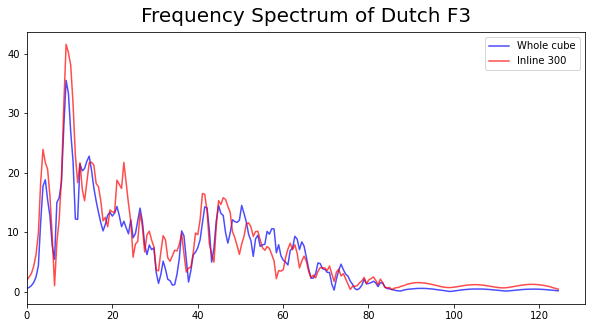

In [129]:
# transpose the cube
transp_cube = np.transpose(data)

# time
min_time = 0
max_time = len(twt)

# crosslines
xmin = 0
xmax = len(crosslines)

# inlines
ymin = 0
ymax = len(inlines)

mean_xl_traces = [] # mean of crossline traces of each inline section

for i in range(len(inlines)):
  mean_xl = np.mean(transp_cube[min_time:max_time, xmin:xmax, i], axis=1)
  mean_xl_traces.append(mean_xl)

transp_xl = np.transpose(mean_xl_traces)

# take average of each individual mean values of xl in the inline section

trace = np.mean(transp_slice[min_time:max_time, ymin:ymax], axis=1)

Fs_seis = 1 / 0.004  # Seconds.
n_seis = len(trace)
k_seis = np.arange(n_seis)
T_seis = n_seis / Fs_seis
freq_seis = k_seis / T_seis
freq_seis_whole = freq_seis[range(n_seis//2)]  # One side frequency range.

spec_seis = np.fft.fft(trace) / n_seis  # FFT computing and normalization.
spec_seis = spec_seis[range(n_seis//2)]

# This is to smooth the spectrum over a window of 10.
roll_win = np.ones(10) / 10
spec_seis_whole = np.convolve(spec_seis, roll_win, mode='same')

plt.figure(figsize=(10,5))
plt.plot(freq_seis_whole, np.abs(spec_seis_whole), color='blue', alpha=.7, label='Whole cube')
plt.plot(freq_seis_il, np.abs(spec_seis_il), color='red', alpha=.7, label='Inline 300')
plt.xlim(xmin=0)
plt.title('Frequency Spectrum of Dutch F3', size=20, pad=10)
plt.legend()
plt.show()